In [1]:
import os
os.chdir('..')

In [2]:
from src.data_peparation import read_files
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pandas as pd

#plotly
import plotly.graph_objects as go
# import plotly.io as pio


In [3]:
measurement_data, instrument_data, pollutant_data = read_files()

# Measurement data

In [4]:
measurement_data.head(5)

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


## map

In [5]:
locations = measurement_data[["Station code", "Latitude", "Longitude"]].drop_duplicates()

# Crear el mapa
mapa = folium.Map(
    location=[locations['Latitude'].mean(), locations['Longitude'].mean()],
    zoom_start=13,
    tiles='OpenStreetMap'
)

# Añadir marcadores
for idx, row in locations.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Código: {row['Station code']}",
        tooltip=f"Código: {row['Station code']}",
        icon=folium.Icon(color='blue', icon='info-sign')  # Personalización opcional
    ).add_to(mapa)

# Mostrar el mapa en el Notebook
mapa

## missing values

In [6]:
measurement_data.isna().sum()

Measurement date    0
Station code        0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64

In [7]:
measurement_data.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,621588.000000,621588.000000,621588.000000,621588.00000,621588.000000,621588.000000,621588.000000,621588.000000,621588.000000
mean,215.980915,37.554003,126.988930,-0.00135,0.022904,0.018718,0.508598,43.978420,25.504612
std,7.192600,0.053397,0.078829,0.07622,0.114483,0.097799,0.399569,71.664738,43.760796
min,204.000000,37.452357,126.835151,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,210.000000,37.517528,126.927102,0.00300,0.016000,0.009000,0.300000,22.000000,11.000000
50%,216.000000,37.544962,127.004850,0.00400,0.025000,0.021000,0.500000,35.000000,19.000000
75%,222.000000,37.584848,127.047470,0.00500,0.038000,0.035000,0.600000,53.000000,31.000000
max,228.000000,37.658774,127.136792,3.73600,38.445000,33.600000,71.700000,3586.000000,6256.000000


## decimals

In [8]:
# print max number decimals in each variable: SO2	NO2	O3	CO	PM10	PM2.5
measurement_data['SO2'].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0).value_counts()

SO2
3     577058
16     33670
1       7844
2       3016
Name: count, dtype: int64

In [9]:
# print max number decimals in each variable: SO2	NO2	O3	CO	PM10	PM2.5
measurement_data['NO2'].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0).value_counts()

NO2
3     543414
2      62049
1       8140
16      7985
Name: count, dtype: int64

In [10]:
# print max number decimals in each variable: SO2	NO2	O3	CO	PM10	PM2.5
measurement_data['O3'].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0).value_counts()

O3
3     547572
2      51510
16     13891
1       8615
Name: count, dtype: int64

In [11]:
# print max number decimals in each variable: SO2	NO2	O3	CO	PM10	PM2.5
measurement_data['CO'].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0).value_counts()

CO
1    621588
Name: count, dtype: int64

In [12]:
# print max number decimals in each variable: SO2	NO2	O3	CO	PM10	PM2.5
measurement_data['PM10'].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0).value_counts()

PM10
1    621588
Name: count, dtype: int64

In [13]:
# print max number decimals in each variable: SO2	NO2	O3	CO	PM10	PM2.5
measurement_data['PM2.5'].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0).value_counts()

PM2.5
1    621588
Name: count, dtype: int64

## histograms

Text(0.5, 1.0, 'PM2.5')

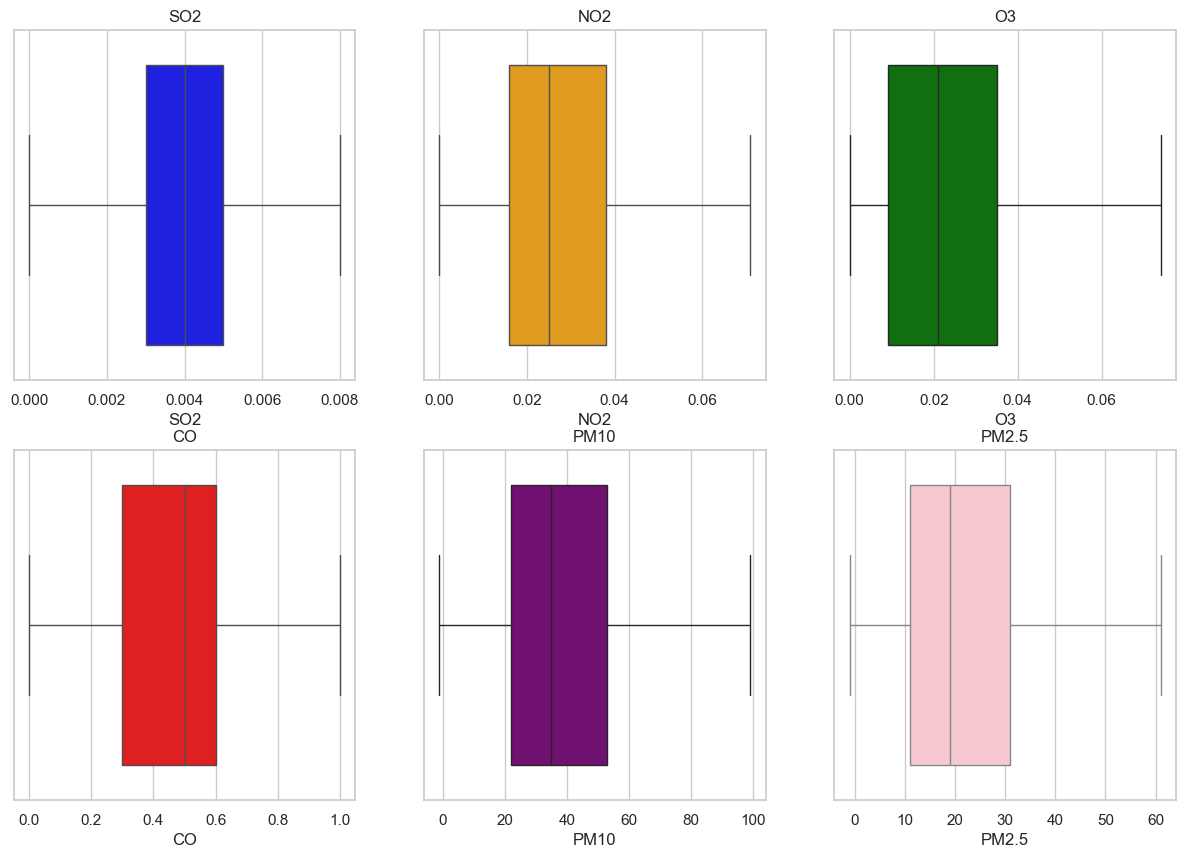

In [14]:
# plot boxplots of each variable: SO2	NO2	O3	CO	PM10	PM2.5 trimming the outliers
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.boxplot(x=measurement_data['SO2'], color='blue', showfliers=False)
plt.title('SO2')
plt.subplot(2, 3, 2)
sns.boxplot(x=measurement_data['NO2'], color='orange', showfliers=False)
plt.title('NO2')
plt.subplot(2, 3, 3)
sns.boxplot(x=measurement_data['O3'], color='green', showfliers=False)
plt.title('O3')
plt.subplot(2, 3, 4)
sns.boxplot(x=measurement_data['CO'], color='red', showfliers=False)
plt.title('CO')
plt.subplot(2, 3, 5)
sns.boxplot(x=measurement_data['PM10'], color='purple', showfliers=False)
plt.title('PM10')
plt.subplot(2, 3, 6)
sns.boxplot(x=measurement_data['PM2.5'], color='pink', showfliers=False)
plt.title('PM2.5')







## correlation matrix

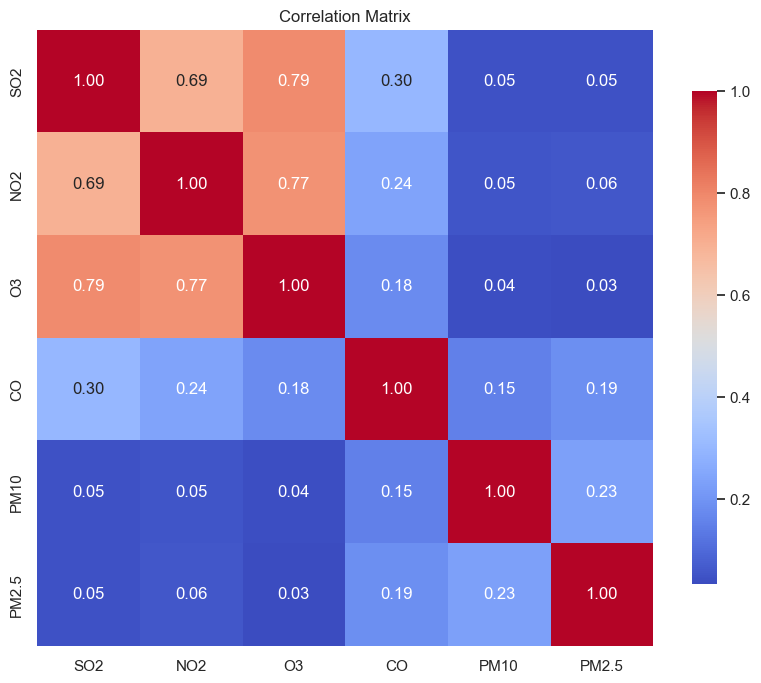

In [15]:
# correlation matrix: SO2	NO2	O3	CO	PM10	PM2.5
corr = measurement_data[["SO2", "NO2", "O3", "CO", "PM10", "PM2.5"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()



## dates

In [16]:
start_date = measurement_data['Measurement date'].min()
end_date = measurement_data['Measurement date'].max()

print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Start date: 2021-01-01 00:00:00
End date: 2023-12-31 23:00:00


C:\Users\AlbertFerreVidal\AppData\Local\Temp\ipykernel_3592\480206915.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  missing_dates = full_range_dates[~full_range_dates.isin(measurement_data['Measurement date'])]


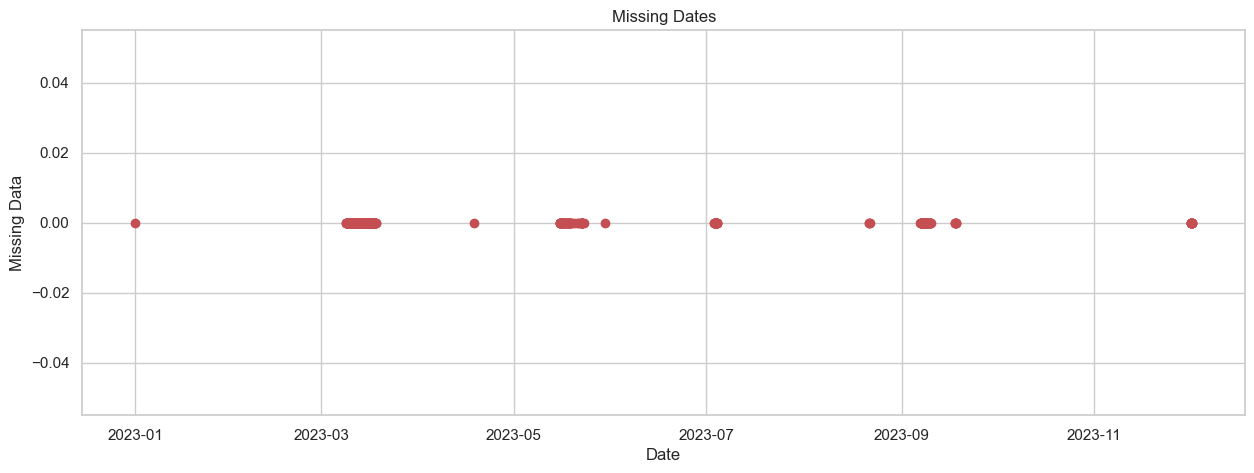

In [17]:
full_range_dates = pd.date_range(start=measurement_data['Measurement date'].min(), end=measurement_data['Measurement date'].max(), freq='h')

# visualize hours not covered by measurement data
missing_dates = full_range_dates[~full_range_dates.isin(measurement_data['Measurement date'])]
plt.figure(figsize=(15, 5))
plt.plot(missing_dates, [0] * len(missing_dates), 'ro')
plt.title('Missing Dates')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.show()

## time series

In [18]:
# plot time series for S02 and staiontion code 205 with plotly
station_code = 205
station_data = measurement_data[measurement_data['Station code'] == station_code]


# pio.renderers.default = "browser"  # Use the default browser for rendering

fig = go.Figure()
fig.add_trace(go.Scatter(x=station_data['Measurement date'], y=station_data['PM2.5'],
                         mode='lines',
                        #  name='SO2',
                         line=dict(color='blue', width=2)))